In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy
import networkx as nx
import ssgetpy
from IPython.display import clear_output

/home/tyler/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [4]:
colors = plt.cm.magma(np.linspace(.3,1,8))

In [5]:
def get_coloring(S):
    "get coloring correspoding to sparsity pattern"
    
    n,d = S.shape
    G = nx.from_numpy_array(S.T@S)
    nx_color = nx.greedy_color(G)
    colors = np.array([nx_color[i] for i in range(d)])

    return colors

In [6]:
def hard_sparsity(k):

    S = np.zeros((k**2,k**2))
    for p in range(k):
        for q in range(k):
            for i in range(k):
                for j in range(k):
                    if i==q or j==p:
                        S[p*k+i,q*k+j] = 1
    return S

In [7]:
results = ssgetpy.fetch(colbounds = (500, 1000),limit=250)
matrices = [result.name for result in results]
for result in results:
    result.download(format='MM',destpath='matrices',extract=True);

In [8]:
colorings = {}
sparsities = {}

for i,matrix in enumerate(matrices):
    print(i)
    clear_output(wait=True)
    
    A = sp.io.mmread(f'matrices/{matrix}/{matrix}.mtx').astype('bool')
    n,d = A.shape
    colorings[matrix] = get_coloring(A)
    sparsities[matrix] = np.max(A@np.ones(d))

222


In [9]:
ks = np.geomspace(1,100,10,dtype='int')
ss = [np.max(np.sum(hard_sparsity(k),axis=1)) for k in ks]

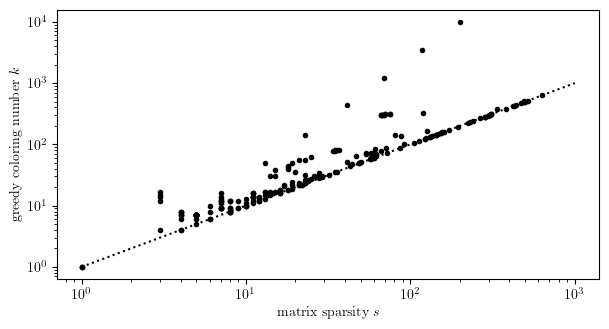

In [10]:
fig,axs = plt.subplots(1,1,figsize=(7,3.5))

plt.plot(ss,ks**2,ls='None',marker='.',color='k')
plt.plot([1,1e3],[1,1e3],color='k',ls=':')

for matrix in matrices:
    plt.plot(sparsities[matrix],max(colorings[matrix])+1,marker='.',color='k')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('matrix sparsity $s$')
plt.ylabel('greedy coloring number $k$')

plt.savefig('imgs/coloring_count.pdf')